 <h1><center>Basic Guide for Data Analysis</center></h1>
 
<img src="deeper.jpeg" width=350 height=350 />
 
 ## 1. Libraries
 
It's important to verify if you are importing all the libraries

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy.optimize as optimization
import scipy.odr.odrpack as odrpack

### Numpy

$*$ NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. In this case array is a data structure that can be interpreted as $\mathbb{R}^{n}$ vectors coordinates.

$*$ We can also use mathematical tools with the best precision on python

$*$ The best library for Numerical Methods. Like integration, solution for linear and non linear ODE.

$*$ All the information can be found on the reference of the library https://numpy.org/doc/stable/reference/. 
I encorage you to search your questions on StackOverflow 

In [2]:
errors = np.array([0.5,0.6,0.4,0.3,0.6])
incertezas = errors*2
errors

array([0.5, 0.6, 0.4, 0.3, 0.6])


$-$ we can change one or more component of the array. ( Note that the values changed due to the operation above )


In [3]:
errors[1:4] = errors[1:4]*np.cos(2)
errors

array([ 0.5       , -0.2496881 , -0.16645873, -0.12484405,  0.6       ])


$-$ we can slice arrays on the components that we're interesed.

$-$ It's important to note is that python consider open intervals 

###### When we declare a variable using an array slicing we dont have a copy of it, wich means that changing one part of the array we change the other variable. If you need to make a copy you can just use np.copy(array)

In [4]:
slice_errors = errors[:3]
slice_errors[2] = 0

errors

array([ 0.5       , -0.2496881 ,  0.        , -0.12484405,  0.6       ])

$-$ Now we gonna use NumPy to create values for x,y and $\sigma_y$

In [5]:
x = np.linspace(0,100,10)

x

array([  0.        ,  11.11111111,  22.22222222,  33.33333333,
        44.44444444,  55.55555556,  66.66666667,  77.77777778,
        88.88888889, 100.        ])

### Model

In [6]:
def f(x, b, a):
    return a*x + b

# Creating the y values with the model
y = f(x,0.5,1)

# Random values between [0.005,0.006]
sigma_y = np.random.uniform(low=0.005, high=0.006, size=(10,))

sigma_y

array([0.00502619, 0.00520858, 0.00510368, 0.005735  , 0.00598083,
       0.00593097, 0.00505421, 0.00596515, 0.00502132, 0.00565782])

## SciPy

$*$ SciPy is a free and open-source Python library used for scientific computing and technical computing. SciPy contains modules for optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, ODE solvers and other tasks common in science and engineering.

$*$ The reference https://docs.scipy.org/doc/scipy/reference/index.html

### Scipy.optimization


$*$ Scipy.optimization is a sub-library of SciPy for optimization, wich means, in our case, linear and non linear regression.

###### $*$ The curve_fit method just consider $\sigma_y$ once it uses the Ordinary Least Squares ( You can propagate the uncertainty on x to y wich is the Total Least Square)
$*$ The reference https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html

In [7]:
# xo is the parameters guess
xo = [0,0]

fit = optimization.curve_fit(f, x, y, p0=xo, sigma=sigma_y,absolute_sigma=True) 

fit

(array([0.5, 1. ]),
 array([[ 9.44539149e-06, -1.33549647e-07],
        [-1.33549647e-07,  2.74296898e-09]]))

$-$ The fit variable received 2 arrays. The first represent the parameters and the second the covariance matrix. In the next section we will see how to present this on a more elegant way

We can calculate the $\chiˆ2$ simple by using the formula

$$
\begin{align}
{\chi}^2=\sum_{k=1}^{n} \frac{(y_i - f(x_i))^2}{\sigma_y^2}
\end{align}
$$

In [8]:
a = fit[0][1]
b = fit[0][0]


# To calculate the parameters errors with the covariance matrix
stdevs = np.sqrt(np.diag(fit[1]))
#stdevs is an array with 2 components stdevs[0] is the error of parameter (b) and stdevs[1] do parameter (a)


Chi2 = sum((y - f(x, b, a))**2/(sigma_y**2))
Chi2

5.0686388782132475e-23

## Pandas

$*$ pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.

$*$ We're going to use Pandas to create a table to the parameters and to import the data.

$*$ The reference : https://pandas.pydata.org/docs/user_guide/index.html

In [9]:
df = pd.DataFrame({'Parameter(a)' : [a,stdevs[1]], 'Parameter(b)' : [b,stdevs[0]]}, index=['Valor', 'Incerteza'])
df

,Parameter(a),Parameter(b)
Valor,1.000000,0.500000
Incerteza,0.000052,0.003073


### Matplotlib
$*$ Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. 

$*$ The reference https://matplotlib.org/tutorials/index.html#introductory

<IPython.core.display.Javascript object>


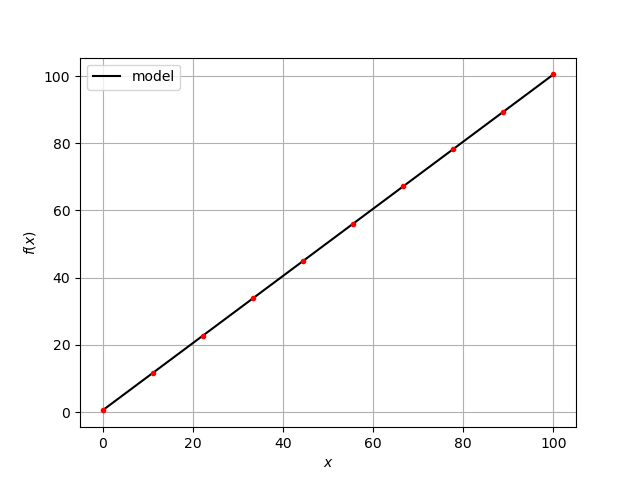

In [10]:
h = plt.figure(1)
h = plt.plot(x,f(x,b,a), label="model", color='black')
h = plt.errorbar(x,y,sigma_y,fmt='.',color='red')
h = plt.grid()
h = plt.ylabel(r'$f(x)$')
h = plt.xlabel(r'$x$')
h = plt.legend()
# This line of code save the plot in the notebook file directory
plt.savefig('teste_1.png', format='png', dpi=150,bbox_inches = "tight")
plt.show(h)

<IPython.core.display.Javascript object>


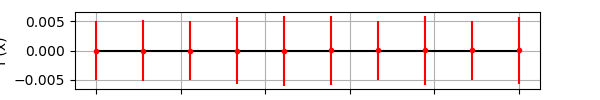

In [11]:
g = plt.figure(2)
g.set_size_inches(6, 1)
g =plt.errorbar(x,y-f(x,b,a),sigma_y,fmt='.',color='red')
g = plt.hlines(0,x.min(),x.max(),color='black')
g = plt.grid()
g = plt.ylabel("f (x)")
g = plt.xlabel('x')
g = plt.savefig('teste_1_resid.png', format='png', dpi=150,bbox_inches = "tight")
g = plt.show(g)

## Aditional information

$-$ Since all thoses libraries are getting more famous over time, the content is very vast. Hence, i encorage you to search information on StackOverflow.

<img src="libraries.png" width=450 height=350 />



$(*)$ Good and basic video of curve fitting in python: 
https://www.youtube.com/watch?v=Jl-Ye38qkRc&t=810s

$(*)$ Nice article about curve fitting in python: 
https://towardsdatascience.com/basic-curve-fitting-of-scientific-data-with-python-9592244a2509


# 2. Putting into pratice

#### Now, let's use uncertain in x and y

$*$ We'll use data in csv and txt

#### Importing txt with Pandas

In [12]:
data = pd.read_csv('exemplo.txt',sep="\t")

# When the the decimal separator is "," we need to use
# data_1 = pd.read_csv('exemplo.txt', sep="\t", decimal=",")

data.head()

,x (cm),y (cm),sigma_x (cm),sigma_y (cm)
0,91.0,-1.67,0.182,-0.0835
1,91.5,-2.50,0.183,-0.1250
2,92.0,-3.01,0.184,-0.1510
3,92.5,-3.91,0.185,-0.1960
4,93.0,-4.15,0.186,-0.2080


#### Important csv with Pandas

In [13]:
data = pd.read_csv('exemplo.csv')
data.head()

,x (cm),y (cm),sigma_x (cm),sigma_y (cm)
0,91.0,-1.67,0.182,-0.0835
1,91.5,-2.50,0.183,-0.1250
2,92.0,-3.01,0.184,-0.1510
3,92.5,-3.91,0.185,-0.1960
4,93.0,-4.15,0.186,-0.2080


<IPython.core.display.Javascript object>


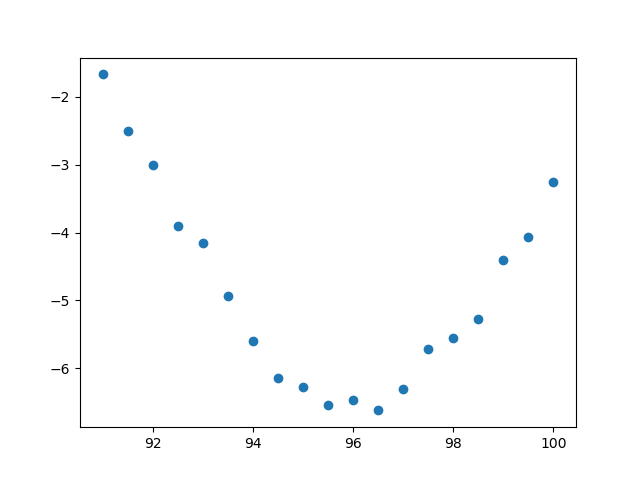

In [14]:
x = data['x (cm)']
y = data['y (cm)']

# x and y are a Series ( data structure similar to Data Frame )
plt.figure(0)
plt.scatter(x,y)
plt.show()

### Data Analysis

#### Model

In [15]:
# Importante que notar que agora nossos parâmetros são representados por array
# Outro fator a se notar é a ordem na a f, ou seja, f(p,x) "p" vem primeiro

def f(p,x):
    return p[0]*x**2 + p[1]*x + p[2]

##### Using the values $x$, $y$, $\sigma_x$ e $\sigma_y$

In [16]:
x = data['x (cm)']
y = data['y (cm)']
sigma_x = data['sigma_x (cm)']
sigma_y = data['sigma_y (cm)']


### Fitting

$*$ I'll use the Orthogonal Distance Regression (ODR) but you can use the Total Least Square (TLS). If you want know more about that you should check: https://towardsdatascience.com/total-least-squares-in-comparison-with-ols-and-odr-f050ffc1a86a#:~:text=Total%20least%20squares(aka%20TLS,often%20say%20a%20fitted%20value).

In [17]:
# model object ( isso é um termo técnico para dizer que o modelo está guardado em um "objeto")
model_object = odrpack.Model(f)
# realdata object ( termo técnico para dizer que dizer que o modelo está guardado em um "objeto")
data_object = odrpack.RealData(x,y,sx=sigma_x, sy=sigma_y)
# Estabelece a relação entre data e modelo, e em geral necessita de das condições iniciais
# No caso do nosso modelo temos 3 parâmetros, ou seja beta0 = lista de 3 elementos
# Set up ODR with the model and data.
odr = odrpack.ODR(data_object, model_object, beta0=[1,1,1])
# Run the regression.
odr.set_job(fit_type=0)  # fit_type = 0 executa a regressão por ODR e fit_type = 2 por MMQ
# O tópico do fit_type é um complicado e vai além do proposito dessa introdução
out = odr.run()
# print the regression
out.pprint()

Beta: [ 2.01583133e-01 -3.87100151e+01  1.85195389e+03]
Beta Std Error: [7.60198651e-03 1.45258036e+00 6.93460557e+01]
Beta Covariance: [[ 1.46180611e-04 -2.79299370e-02  1.33306903e+00]
 [-2.79299370e-02  5.33723001e+00 -2.54779487e+02]
 [ 1.33306903e+00 -2.54779487e+02  1.21640756e+04]]
Residual Variance: 0.39533422646943844
Inverse Condition #: 7.35277715433665e-08
Reason(s) for Halting:
  Sum of squares convergence


### Plotting

In [18]:
y_i = f([2.01584576e-01, -3.87102908e+01, 1.85196706e+03],x)


<IPython.core.display.Javascript object>


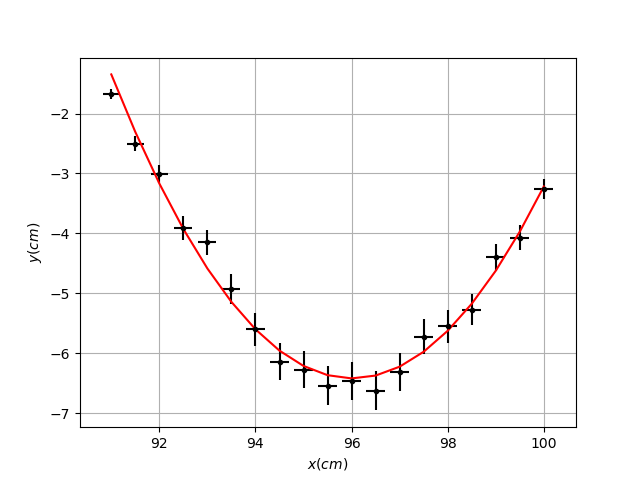

<IPython.core.display.Javascript object>


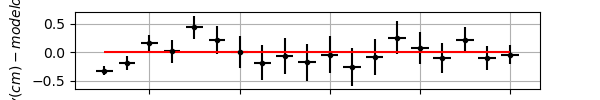

In [19]:

ax2 = plt.figure(3)
ax2 = plt.errorbar(x, y, xerr=sigma_x, yerr=sigma_y, linestyle='None', marker='.',color='black')
#ax2 = plt.ylim(-1,2)
#ax2 = plt.xlim(0, 20000)
ax2 = plt.plot(x, y_i, label='model',color='red')
# axis names
ax2 = plt.xlabel('$x (cm)$')
ax2 = plt.ylabel('$y (cm)$')
ax2 = plt.grid()
#Saving the figure
ax2 = plt.savefig('exemplo.png',dpi=150,bbox_inches = "tight")


ax3 = plt.figure(4)
ax3 = plt.errorbar(x, y - y_i
                   ,xerr=sigma_x, yerr=sigma_y, linestyle='None', marker='.',color='black')

ax3 = plt.hlines(0,x.min(),x.max(),color='red')
ax3 = plt.grid()
# axis names
ax3 = plt.xlabel(r'$x (cm)$')
ax3 = plt.ylabel(r'$y(cm) - modelo$')
ax3 = plt.gcf()
#ax3 = plt.ylim(-1,1)
ax3.set_size_inches(6, 1)
#Saving the figure
ax3 = plt.savefig('exemplo_resid.png',dpi=150,bbox_inches = "tight")


